In [2]:
from deepmol.pipeline import Pipeline

pipeline = Pipeline.load("sm_predictor_pipeline_motpe/trial_117")

2023-07-12 18:43:46.147311: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-12 18:43:46.960675: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'pytorch_lightning'
Skipped loading some Jax models, missing a dependency. jax requires jaxlib to be installed. See https://github.com/google/jax#installation for installation instructions.


FileNotFoundError: [Errno 2] No such file or directory: '/home/bisbii/Desktop/PHD/SMPrecursorPredictor/examples/test_case_study/sm_predictor_pipeline_motpe/trial_117/standardizer.pkl'

In [44]:
import pandas as pd

train = pd.read_csv("/home/bisbii/Desktop/DeepMol/examples/test_case_study/train.csv")
test = pd.read_csv("/home/bisbii/Desktop/DeepMol/examples/test_case_study/test.csv")
valid = pd.read_csv("/home/bisbii/Desktop/DeepMol/examples/test_case_study/valid.csv")

total = pd.concat([train, test, valid]).shape[0]

In [45]:
print(train.shape[0] / total)
print(valid.shape[0] / total)
print(test.shape[0] / total)

0.6826056826056826
0.20997920997921
0.10741510741510742


In [46]:
import numpy as np

y_test_sum = np.sum(test.iloc[:, 2:])
y_train_sum = np.sum(train.iloc[:, 2:])
y_validation_sum = np.sum(valid.iloc[:, 2:])

sum_of_all = pd.DataFrame([y_train_sum, y_validation_sum, y_test_sum], index=["train", "validation", "test"])

In [47]:
sum_of_all.loc['Validation relative split', :] = sum_of_all.loc['validation', :] / (sum_of_all.loc['train', :] + sum_of_all.loc['test', :] + sum_of_all.loc['validation', :]) * 100

sum_of_all.loc['Test relative split', :] = sum_of_all.loc['test', :] / (sum_of_all.loc['train', :] + sum_of_all.loc['test', :] + sum_of_all.loc['validation', :]) * 100
sum_of_all.loc['Train relative split', :] = sum_of_all.loc['train', :] / (sum_of_all.loc['train', :] + sum_of_all.loc['test', :]+ sum_of_all.loc['validation', :]) * 100

In [48]:
df = pd.melt(sum_of_all.T.reset_index(), id_vars=['index']).rename(columns={'index': 'Precursor', 'value': 'Percentage of data'})
df = df[(df["variable"]!="train") & (df["variable"]!="validation") & (df["variable"]!="test")]

In [49]:
df1 = sum_of_all.loc['Test relative split', :].describe()
df2 = sum_of_all.loc['Train relative split', :].describe()
df3 = sum_of_all.loc['Validation relative split', :].describe()
df_all = pd.concat([df1, df2, df3], axis=1)
df_all.drop(['count'], inplace=True)
table_styled = df_all.style.background_gradient(cmap="YlGn")
table_styled
table_styled.to_html("split_result.html")

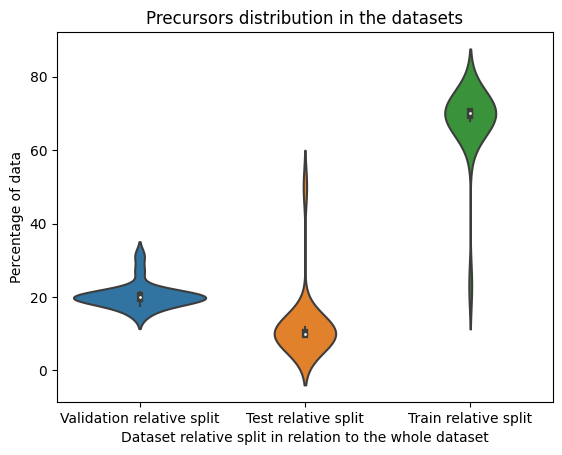

In [51]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.violinplot(data=df, x = "variable", y = "Percentage of data")
#add title and axis names
plt.title('Precursors distribution in the datasets')
# write x and y labels titles
plt.xlabel('Dataset relative split in relation to the whole dataset')
plt.ylabel('Percentage of data')
plt.savefig("split_result.png")

In [52]:
train.shape

(985, 22)

In [54]:
valid.shape

(303, 22)

In [55]:
test.shape

(155, 22)

In [2]:
pipeline.steps

[('standardizer',
  <deepmol.standardizer.chembl_standardizer.ChEMBLStandardizer at 0x7fd6000512e0>),
 ('featurizer',
  <deepmol.compound_featurization.mixed_descriptors.MixedFeaturizer at 0x7fd57f6ce280>),
 ('feature_selector',
  <deepmol.base.transformer.PassThroughTransformer at 0x7fd57f6e0550>),
 ('model',
  SklearnModel(model=RidgeClassifier(alpha=7.338782054460601, fit_intercept=False,
                                     solver='sparse_cg'),
               model_dir='/home/bisbii/Desktop/PHD/SMPrecursorPredictor/examples/test_case_study/sm_predictor_pipeline_motpe/trial_117/model/model.pkl'))]

In [60]:
from deepmol.loaders import CSVLoader

train = CSVLoader("/home/bisbii/Desktop/DeepMol/examples/test_case_study/train.csv",
                        labels_fields=['C00073', 'C00078', 'C00079', 'C00082', 'C00235', 'C00341',
                                       'C00353', 'C00448', 'C01789', 'C03506',
                                       'C00047', 'C00108', 'C00187', 'C00148', 'C00041',
                                       'C00129', 'C00062', 'C01852', 'C00049', 'C00135'],
                        id_field="ids", smiles_field="smiles").create_dataset()
valid = CSVLoader("/home/bisbii/Desktop/DeepMol/examples/test_case_study/valid.csv",
                        labels_fields=['C00073', 'C00078', 'C00079', 'C00082', 'C00235', 'C00341',
                                       'C00353', 'C00448', 'C01789', 'C03506',
                                       'C00047', 'C00108', 'C00187', 'C00148', 'C00041',
                                       'C00129', 'C00062', 'C01852', 'C00049', 'C00135'],
                        id_field="ids", smiles_field="smiles").create_dataset()
test = CSVLoader("/home/bisbii/Desktop/DeepMol/examples/test_case_study/test.csv",
                  labels_fields=['C00073', 'C00078', 'C00079', 'C00082', 'C00235', 'C00341',
                                 'C00353', 'C00448', 'C01789', 'C03506',
                                 'C00047', 'C00108', 'C00187', 'C00148', 'C00041',
                                 'C00129', 'C00062', 'C01852', 'C00049', 'C00135'],
                  id_field="ids", smiles_field="smiles").create_dataset()

2023-07-06 16:44:17,487 — INFO — Assuming multitask since y has more than one dimension. If otherwise, explicitly set the mode to 'classification' or 'regression'!
2023-07-06 16:44:17,524 — INFO — Assuming multitask since y has more than one dimension. If otherwise, explicitly set the mode to 'classification' or 'regression'!
2023-07-06 16:44:17,543 — INFO — Assuming multitask since y has more than one dimension. If otherwise, explicitly set the mode to 'classification' or 'regression'!


In [22]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, balanced_accuracy_score
from deepmol.metrics import Metric


def f1_score_macro(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro')

def precision_macro(y_true, y_pred):
    return precision_score(y_true, y_pred, average='macro')

def recall_macro(y_true, y_pred):
    return recall_score(y_true, y_pred, average='macro')


f1_score_macro_metric = Metric(f1_score_macro)
precision_score_macro_metric = Metric(precision_macro)
recall_score_macro_metric = Metric(recall_macro)
accuracy_score_metric = Metric(balanced_accuracy_score)

pipeline.evaluate(test, [f1_score_macro_metric, precision_score_macro_metric, recall_score_macro_metric, accuracy_score_metric], per_task_metrics=True)

[14:03:44] Running Normalizer
[14:03:44] Running Normalizer
[14:03:44] Running Normalizer
[14:03:44] Running Normalizer
[14:03:44] Running Normalizer
[14:03:44] Running Normalizer
[14:03:44] Running Normalizer
[14:03:44] Running Normalizer
[14:03:44] Running Uncharger
[14:03:44] Running Uncharger
[14:03:44] Running Uncharger
[14:03:44] Running Uncharger
[14:03:44] Running Uncharger
[14:03:44] Running Uncharger
[14:03:44] Running Uncharger
[14:03:44] Running Uncharger
[14:03:44] Running Uncharger
[14:03:44] Running Uncharger
[14:03:44] Running Uncharger
[14:03:44] Running Uncharger
[14:03:44] Running Uncharger
[14:03:44] Running Uncharger
[14:03:44] Running Uncharger
[14:03:44] Running Uncharger
[14:03:44] Running Uncharger
[14:03:44] Running Normalizer
[14:03:44] Running Normalizer
[14:03:44] Running Normalizer
[14:03:44] Running Uncharger
[14:03:44] Running Uncharger
[14:03:44] Running Uncharger
[14:03:44] Running Uncharger
[14:03:44] Running Uncharger
[14:03:44] Running Uncharger
[14

({'f1_score_macro': 0.8155905121506066,
  'precision_macro': 0.8660611937082525,
  'recall_macro': 0.788596806243865,
  'balanced_accuracy_score': 0.8899728150358428},
 {'f1_score_macro': [1.0,
   0.9853344687293026,
   0.8681332036947009,
   0.9016229939251066,
   1.0,
   0.9598549598549598,
   0.8975846119961823,
   0.8037619822752757,
   1.0,
   0.495114006514658,
   0.9528732137427789,
   1.0,
   1.0,
   0.8503861003861004,
   0.8317046688382194,
   0.872301861921239,
   0.8586196412283369,
   0.8716887417218542,
   0.898360655737705,
   1.0],
  'precision_macro': [1.0,
   0.9963235294117647,
   0.8681332036947009,
   0.8935678749111585,
   1.0,
   0.9285714285714286,
   0.9036970781156828,
   0.819634703196347,
   1.0,
   0.49032258064516127,
   0.9166666666666667,
   1.0,
   1.0,
   0.8503861003861004,
   0.9967532467532467,
   0.9829931972789115,
   0.8933333333333333,
   0.993421052631579,
   0.9967320261437909,
   1.0],
  'recall_macro': [1.0,
   0.975,
   0.8681332036947009,


In [8]:
Pipeline.load("sm_predictor_pipeline_evolutionary/trial_366").evaluate(test, [f1_score_macro_metric, precision_score_macro_metric, recall_score_macro_metric])

/home/bisbii/anaconda3/envs/sm_precursor_predictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


({'f1_score_macro': 0.7777595949403697,
  'precision_macro': 0.9023249299719888,
  'recall_macro': 0.7154089755560344},
 {})

In [13]:
Pipeline.load("sm_predictor_pipeline_random/trial_216").evaluate(test, [f1_score_macro_metric, precision_score_macro_metric, recall_score_macro_metric])

[16:35:45] Running Normalizer
[16:35:45] Running Normalizer
[16:35:45] Running Normalizer
[16:35:45] Running Normalizer
[16:35:45] Running Normalizer
[16:35:45] Running Uncharger
[16:35:45] Running Uncharger
[16:35:45] Running Normalizer
[16:35:45] Running Uncharger
[16:35:45] Running Uncharger
[16:35:45] Running Uncharger
[16:35:45] Running Normalizer
[16:35:45] Running Uncharger
[16:35:45] Running Uncharger
[16:35:45] Running Normalizer
[16:35:45] Running Uncharger
[16:35:45] Running Uncharger
[16:35:45] Running Uncharger
[16:35:45] Running Uncharger
[16:35:45] Running Normalizer
[16:35:45] Running Uncharger
[16:35:45] Running Uncharger
[16:35:45] Running Uncharger
[16:35:45] Running Uncharger
[16:35:45] Running Uncharger
[16:35:45] Running Uncharger
[16:35:45] Running Uncharger
[16:35:45] Running Uncharger
[16:35:45] Running Normalizer
[16:35:45] Running Uncharger
[16:35:45] Running Uncharger
[16:35:45] Running Uncharger
[16:35:45] Running Uncharger
[16:35:45] Running Uncharger
[16:

({'f1_score_macro': 0.8084015535274117,
  'precision_macro': 0.8724484823169034,
  'recall_macro': 0.7729486580957169},
 {})

In [18]:
Pipeline.load("sm_predictor_pipeline_tpe/trial_485").evaluate(test, [f1_score_macro_metric, precision_score_macro_metric, recall_score_macro_metric, accuracy_score_metric], per_task_metrics=True)

[14:02:15] Running Normalizer
[14:02:15] Running Normalizer
[14:02:15] Running Normalizer
[14:02:15] Running Normalizer
[14:02:15] Running Normalizer
[14:02:15] Running Uncharger
[14:02:15] Running Normalizer
[14:02:15] Running Uncharger
[14:02:15] Running Uncharger
[14:02:15] Running Uncharger
[14:02:15] Running Normalizer
[14:02:15] Running Normalizer
[14:02:15] Running Uncharger
[14:02:15] Running Uncharger
[14:02:15] Running Uncharger
[14:02:15] Running Uncharger
[14:02:15] Running Uncharger
[14:02:15] Running Uncharger
[14:02:15] Running Uncharger
[14:02:15] Running Uncharger
[14:02:15] Running Uncharger
[14:02:15] Running Uncharger
[14:02:15] Running Uncharger
[14:02:15] Running Uncharger
[14:02:15] Running Uncharger
[14:02:15] Running Uncharger
[14:02:15] Running Normalizer
[14:02:15] Running Normalizer
[14:02:15] Running Normalizer
[14:02:15] Running Uncharger
[14:02:15] Running Uncharger
[14:02:15] Running Uncharger
[14:02:15] Running Uncharger
[14:02:15] Running Uncharger
[14

({'f1_score_macro': 0.819072627224801,
  'precision_macro': 0.8985932150638032,
  'recall_macro': 0.779033314180373,
  'accuracy_score': 0.7806451612903226},
 {'f1_score_macro': [1.0,
   0.9853344687293026,
   0.8601840158758796,
   0.9232749232749233,
   1.0,
   1.0,
   0.955150462962963,
   0.9410197869101979,
   1.0,
   0.495114006514658,
   0.9528732137427789,
   0.9251930501930501,
   1.0,
   0.7933333333333332,
   0.8317046688382194,
   0.872301861921239,
   0.7933333333333333,
   0.8716887417218542,
   0.898360655737705,
   1.0],
  'precision_macro': [1.0,
   0.9963235294117647,
   0.8565476190476191,
   0.9560954816709293,
   1.0,
   1.0,
   0.955150462962963,
   0.9931972789115646,
   1.0,
   0.49032258064516127,
   0.9166666666666667,
   0.875,
   1.0,
   0.986842105263158,
   0.9967532467532467,
   0.9829931972789115,
   0.865066225165563,
   0.993421052631579,
   0.9967320261437909,
   1.0],
  'recall_macro': [1.0,
   0.975,
   0.8640009722897424,
   0.8962962962962964,
   

In [23]:
Pipeline.load("sm_predictor_pipeline_tpe/trial_485").evaluate(test, [f1_score_macro_metric, precision_score_macro_metric, recall_score_macro_metric])

[14:22:56] Running Normalizer
[14:22:56] Running Normalizer
[14:22:56] Running Normalizer
[14:22:56] Running Uncharger
[14:22:56] Running Normalizer
[14:22:56] Running Normalizer
[14:22:56] Running Normalizer
[14:22:56] Running Uncharger
[14:22:56] Running Uncharger
[14:22:56] Running Uncharger
[14:22:56] Running Normalizer
[14:22:56] Running Uncharger
[14:22:56] Running Uncharger
[14:22:56] Running Normalizer
[14:22:56] Running Uncharger
[14:22:56] Running Uncharger
[14:22:56] Running Uncharger
[14:22:56] Running Uncharger
[14:22:56] Running Uncharger
[14:22:56] Running Uncharger
[14:22:56] Running Uncharger
[14:22:56] Running Uncharger
[14:22:56] Running Uncharger
[14:22:56] Running Uncharger
[14:22:56] Running Uncharger
[14:22:56] Running Uncharger
[14:22:56] Running Uncharger
[14:22:56] Running Uncharger
[14:22:56] Running Uncharger
[14:22:56] Running Uncharger
[14:22:56] Running Normalizer
[14:22:56] Running Normalizer
[14:22:56] Running Normalizer
[14:22:56] Running Normalizer
[1

({'f1_score_macro': 0.819072627224801,
  'precision_macro': 0.8985932150638032,
  'recall_macro': 0.779033314180373},
 {})

In [4]:
!pwd

/home/joao/Desktop/SMPrecursorPredictor/examples/test_case_study


In [1]:
import numpy as np
labels = np.array(['C00073', 'C00078', 'C00079', 'C00082', 'C00235', 'C00341',
                                       'C00353', 'C00448', 'C01789', 'C03506',
                                       'C00047', 'C00108', 'C00187', 'C00148', 'C00041',
                                       'C00129', 'C00062', 'C01852', 'C00049', 'C00135'])

labels_ = {
    'C00341': 'Geranyl diphosphate',
    'C01789': 'Campesterol',
    'C00078': 'Tryptophan',
    'C00049': 'L-Aspartate',
    'C00183': 'L-Valine',
    'C03506': 'Indoleglycerol phosphate',
    'C00187': 'Cholesterol',
    'C00079': 'L-Phenylalanine',
    'C00047': 'L-Lysine',
    'C01852': 'Secologanin',
    'C00407': 'L-Isoleucine',
    'C00129': 'Isopentenyl diphosphate',
    'C00235': 'Dimethylallyl diphosphate',
    'C00062': 'L-Arginine',
    'C00353': 'Geranylgeranyl diphosphate',
    'C00148': 'L-Proline',
    'C00073': 'L-Methionine',
    'C00108': 'Anthranilate',
    'C00123': 'L-Leucine',
    'C00135': 'L-Histidine',
    'C00448': 'Farnesyl diphosphate',
    'C00082': 'L-Tyrosine',
    'C00041': 'L-Alanine'
}

labels_names = np.array([labels_[label] for label in labels])
labels_names

array(['L-Methionine', 'Tryptophan', 'L-Phenylalanine', 'L-Tyrosine',
       'Dimethylallyl diphosphate', 'Geranyl diphosphate',
       'Geranylgeranyl diphosphate', 'Farnesyl diphosphate',
       'Campesterol', 'Indoleglycerol phosphate', 'L-Lysine',
       'Anthranilate', 'Cholesterol', 'L-Proline', 'L-Alanine',
       'Isopentenyl diphosphate', 'L-Arginine', 'Secologanin',
       'L-Aspartate', 'L-Histidine'], dtype='<U26')

In [1]:
from deepmol.pipeline import Pipeline

best_pipeline = Pipeline.load("sm_predictor_pipeline_tpe/trial_485")

2023-07-15 20:41:14.240048: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-15 20:41:14.242184: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-15 20:41:14.288491: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-15 20:41:14.289332: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-15 20:41:14.987463: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
from deepmol.loaders import CSVLoader

indepedent = CSVLoader("../compounds_to_test/PhytoHub_Compounds.csv",
                        id_field="Chemical Name", smiles_field="Smiles").create_dataset(sep="\t")



In [2]:
from rdkit import Chem
from rdkit.Chem import MolToSmiles

reader1 = Chem.SmilesMolSupplier("../compounds_to_test/LOTUS_DB.smi", delimiter="\t")
mols = [mol for mol in reader1]
ids = [mol.GetProp("_Name") for mol in mols]
smiles=[MolToSmiles(mol) for mol in mols]

In [2]:
from deepmol.datasets import SmilesDataset


lotus_dataset = SmilesDataset(smiles=smiles, mols=mols, ids=ids)

In [7]:
lotus_dataset.to_csv("lotus_dataset.csv")

In [5]:
predictions = best_pipeline.predict(lotus_dataset)

[18:13:15] Running Normalizer
[18:13:15] Running Normalizer
[18:13:15] Running Normalizer
[18:13:15] Running Normalizer
[18:13:15] Running Normalizer
[18:13:15] Running Normalizer
[18:13:15] Running Uncharger
[18:13:15] Running Uncharger
[18:13:15] Running Uncharger
[18:13:15] Running Normalizer
[18:13:15] Running Uncharger
[18:13:15] Running Uncharger
[18:13:15] Running Uncharger
[18:13:15] Running Normalizer
[18:13:15] Running Normalizer
[18:13:15] Running Uncharger
[18:13:15] Running Normalizer
[18:13:15] Running Uncharger
[18:13:15] Running Uncharger
[18:13:15] Running Normalizer
[18:13:15] Running Uncharger
[18:13:15] Running Normalizer
[18:13:15] Running Uncharger
[18:13:15] Running Uncharger
[18:13:15] Running Uncharger
[18:13:15] Running Normalizer
[18:13:15] Running Uncharger
[18:13:15] Running Normalizer
[18:13:15] Running Uncharger
[18:13:15] Running Uncharger
[18:13:15] Running Normalizer
[18:13:15] Running Uncharger
[18:13:15] Running Uncharger
[18:13:15] Running Uncharger

In [ ]:
np.savetxt("predictions.txt", predictions)

In [3]:
from deepmol.datasets import SmilesDataset

esculiosideA = SmilesDataset(ids=["esculioside A"], smiles=["C[C@H]1[C@H]2[C@H](C[C@@H]3[C@@]2(CC[C@H]4[C@H]3CC[C@@H]5[C@@]4(CC[C@@H](C5)O[C@H]6[C@@H]([C@H]([C@H]([C@H](O6)CO)O[C@H]7[C@@H]([C@H]([C@@H]([C@H](O7)CO)O)O[C@H]8[C@@H]([C@H]([C@@H](CO8)O)O)O)O[C@H]9[C@@H]([C@H]([C@@H]([C@H](O9)CO)O)O)O)O)O)C)C)O[C@]11[C@H](C[C@@H](CN1)CO[C@H]1[C@@H]([C@H]([C@@H]([C@H](O1)CO)O)O)O)OC(=O)C"])

In [8]:
predictions = best_pipeline.predict(esculiosideA)
ones = predictions == 1
labels_names[ones[0]]

[18:01:05] Running Normalizer
[18:01:05] Running Uncharger
[18:01:05] Running Uncharger
[18:01:05] Running Uncharger


array(['Cholesterol'], dtype='<U26')

In [14]:
predictions = best_pipeline.predict(indepedent)


[12:21:22] Running Normalizer
[12:21:22] Running Normalizer
[12:21:22] Running Normalizer
[12:21:22] Running Uncharger
[12:21:22] Running Normalizer
[12:21:22] Running Uncharger
[12:21:22] Running Uncharger
[12:21:22] Running Normalizer
[12:21:22] Running Normalizer
[12:21:22] Running Uncharger
[12:21:22] Running Uncharger
[12:21:22] Running Normalizer
[12:21:22] Running Uncharger
[12:21:22] Running Normalizer
[12:21:22] Running Uncharger
[12:21:22] Running Normalizer
[12:21:22] Running Uncharger
[12:21:22] Running Normalizer
[12:21:22] Running Uncharger
[12:21:22] Running Uncharger
[12:21:22] Running Normalizer
[12:21:22] Running Normalizer
[12:21:22] Running Uncharger
[12:21:22] Running Uncharger
[12:21:22] Running Uncharger
[12:21:22] Running Uncharger
[12:21:22] Running Uncharger
[12:21:22] Running Uncharger
[12:21:22] Running Uncharger
[12:21:22] Running Uncharger
[12:21:22] Running Uncharger
[12:21:22] Running Uncharger
[12:21:22] Running Uncharger
[12:21:22] Running Uncharger
[1

In [12]:
import numpy as np
np.savetxt("predictions.txt", predictions)
predictions_2 = np.fromfile("predictions.txt")
assert np.array_equal(predictions, predictions_2)

AssertionError: 

In [13]:
predictions_2

array([1.39804329e-076, 1.39804329e-076, 1.39642638e-076, 1.39804329e-076,
       1.39804329e-076, 1.18295070e-076, 1.39804328e-076, 1.39804329e-076,
       1.21089429e-099, 1.39804065e-076, 1.39804329e-076, 2.62395837e+179,
       1.39736850e-076, 1.39804329e-076, 1.39804329e-076, 1.30354290e-076,
       1.39804329e-076, 1.39804329e-076, 3.24250590e-086, 1.39804329e-076,
       1.39804329e-076, 6.99021631e-077, 1.39804329e-076, 1.39804329e-076,
       1.20736829e-153, 1.39804329e-076, 1.39804329e-076, 1.39642638e-076,
       1.39804329e-076, 1.39804329e-076, 1.18295070e-076, 1.39804328e-076,
       1.39804329e-076, 1.21089429e-099, 1.39804065e-076, 1.39804329e-076,
       2.62395837e+179, 1.39736850e-076, 1.39804329e-076, 1.39804329e-076,
       1.30354290e-076, 1.39804329e-076, 1.39804329e-076, 3.24250590e-086,
       1.39804329e-076, 1.39804329e-076, 6.99021631e-077, 1.39804329e-076,
       1.39804329e-076, 1.20736829e-153, 1.39804329e-076, 1.39804329e-076,
       1.39642638e-076, 1

In [20]:
ones = predictions == 1
for i, prediction in enumerate(ones):
    print(indepedent.ids[i])
    print(labels_names[prediction])

(+)-Catechin 3-O-glucose
['L-Phenylalanine']
(+)-catechin-3-O-gallate
['L-Phenylalanine']
(+)-Epicatechin
['L-Phenylalanine']
(+)-fenchone
['Geranyl diphosphate']
(+)-Gallocatechin 3-O-gallate
['L-Phenylalanine']
(-)-caryophyllene-5,6-oxide
['Farnesyl diphosphate']
(-)-caryophyllene-5,6-oxide-2,12-diol
['Farnesyl diphosphate']
(-)-Epicatechin 3'-O-glucuronide
['L-Phenylalanine']
(-)-Epicatechin 3'-O-sulfate
['L-Phenylalanine']
(-)-Epicatechin 4'-O-glucuronide
['L-Phenylalanine']
(-)-Epicatechin 4'-O-sulfate
['L-Phenylalanine']
(-)-Epicatechin 5-O-sulfate
['L-Phenylalanine']
(-)-Epicatechin 7-O-glucuronide
['L-Phenylalanine']
(-)-Epicatechin-5-O-glucuronide
['L-Phenylalanine']
(-)-Epicatechin-7-O-glucuronide
['L-Phenylalanine']
Multiflorine
['L-Lysine']
Physoperuvine
[]
Pinotin A
['L-Phenylalanine']
Schisandrol B
['L-Phenylalanine']
Ursolic acid (trans-3-O-hydroxycinnamoyl-)
['Geranylgeranyl diphosphate']


In [104]:
best_pipeline.steps[1][1].featurizers

In [105]:
global_metrics, test_per_task_metric = best_pipeline.evaluate(test, [f1_score_macro_metric, precision_score_macro_metric, recall_score_macro_metric],per_task_metrics=True)

[17:33:47] Running Normalizer
[17:33:47] Running Normalizer
[17:33:47] Running Normalizer
[17:33:47] Running Normalizer
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Normalizer
[17:33:47] Running Normalizer
[17:33:47] Running Normalizer
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Normalizer
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Normalizer
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Normalizer
[17:33:47] Running Normalizer
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Normalizer
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[1

[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Normalizer
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Normalizer
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Normalizer
[17:33:47] Running Normalizer
[17:33:47] Running Normalizer
[17:33:47] Running Uncharger
[17:33:47] Running Normalizer
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Normalizer
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:

[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Normalizer
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Normalizer
[17:33:47] Running Uncharger
[17:33:47] Running Normalizer
[17:33:47] Running Normalizer
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Normalizer
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Normalizer
[17:33:47] Running Normalizer
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33:47] Running Normalizer
[17:33:47] Running Uncharger
[17:33:47] Running Uncharger
[17:33

In [106]:
global_metrics, train_per_task_metric = best_pipeline.evaluate(train, [f1_score_macro_metric, precision_score_macro_metric, recall_score_macro_metric],per_task_metrics=True)

[17:33:53] Running Normalizer
[17:33:53] Running Normalizer
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17

[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:

[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Normalizer
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33

[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:

[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Normalizer
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Uncharger
[17:33:53] Running Normalizer
[17:33:53] Running Uncharger
[17:3

[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33

[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33

[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:

[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Normalizer
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:3

[17:33:54] Running Normalizer
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Normalizer
[17:33:54] Running Normalizer
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:3

[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:33:54] Running Uncharger
[17:33:54] Running Normalizer
[17:33:54] Running Uncharger
[17:3

In [107]:
global_metrics, valid_per_task_metric = best_pipeline.evaluate(valid, [f1_score_macro_metric, precision_score_macro_metric, recall_score_macro_metric],per_task_metrics=True)

[17:33:58] Running Normalizer
[17:33:58] Running Normalizer
[17:33:58] Running Normalizer
[17:33:58] Running Normalizer
[17:33:58] Running Normalizer
[17:33:58] Running Normalizer
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:

[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:3

[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33

[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:

[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Rule applied: Badamidetautomer2
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Normalizer
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Uncharger
[17:33:58] Running Un

In [71]:
test.label_names

array(['C00073', 'C00078', 'C00079', 'C00082', 'C00235', 'C00341',
       'C00353', 'C00448', 'C01789', 'C03506', 'C00047', 'C00108',
       'C00187', 'C00148', 'C00041', 'C00129', 'C00062', 'C01852',
       'C00049', 'C00135'], dtype='<U6')

In [108]:
labels = {
    'C00341': 'Geranyl diphosphate',
    'C01789': 'Campesterol',
    'C00078': 'Tryptophan',
    'C00049': 'L-Aspartate',
    'C00183': 'L-Valine',
    'C03506': 'Indoleglycerol phosphate',
    'C00187': 'Cholesterol',
    'C00079': 'L-Phenylalanine',
    'C00047': 'L-Lysine',
    'C01852': 'Secologanin',
    'C00407': 'L-Isoleucine',
    'C00129': 'Isopentenyl diphosphate',
    'C00235': 'Dimethylallyl diphosphate',
    'C00062': 'L-Arginine',
    'C00353': 'Geranylgeranyl diphosphate',
    'C00148': 'L-Proline',
    'C00073': 'L-Methionine',
    'C00108': 'Anthranilate',
    'C00123': 'L-Leucine',
    'C00135': 'L-Histidine',
    'C00448': 'Farnesyl diphosphate',
    'C00082': 'L-Tyrosine',
    'C00041': 'L-Alanine'
}

results_per_metric = pd.DataFrame()

for metric in test_per_task_metric:
    for i in range(len(test_per_task_metric[metric])):
        results_per_metric = results_per_metric.append({'metric': metric, 'dataset': "test", 'task': labels[test.label_names[i]], 'value': test_per_task_metric[metric][i]}, ignore_index=True)

    for i in range(len(train_per_task_metric[metric])):
        results_per_metric = results_per_metric.append({'metric': metric, 'dataset': "train", 'task': labels[train.label_names[i]], 'value': train_per_task_metric[metric][i]}, ignore_index=True)

    for i in range(len(valid_per_task_metric[metric])):
        results_per_metric = results_per_metric.append({'metric': metric, 'dataset': "valid", 'task': labels[valid.label_names[i]], 'value': valid_per_task_metric[metric][i]}, ignore_index=True)


/tmp/ipykernel_330764/2708308497.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_per_metric = results_per_metric.append({'metric': metric, 'dataset': "test", 'task': labels[test.label_names[i]], 'value': test_per_task_metric[metric][i]}, ignore_index=True)
/tmp/ipykernel_330764/2708308497.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_per_metric = results_per_metric.append({'metric': metric, 'dataset': "test", 'task': labels[test.label_names[i]], 'value': test_per_task_metric[metric][i]}, ignore_index=True)
/tmp/ipykernel_330764/2708308497.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_per_metric = results_per_metric.append({'metric': metric, 'dataset': "test", 'task': labels[test.la

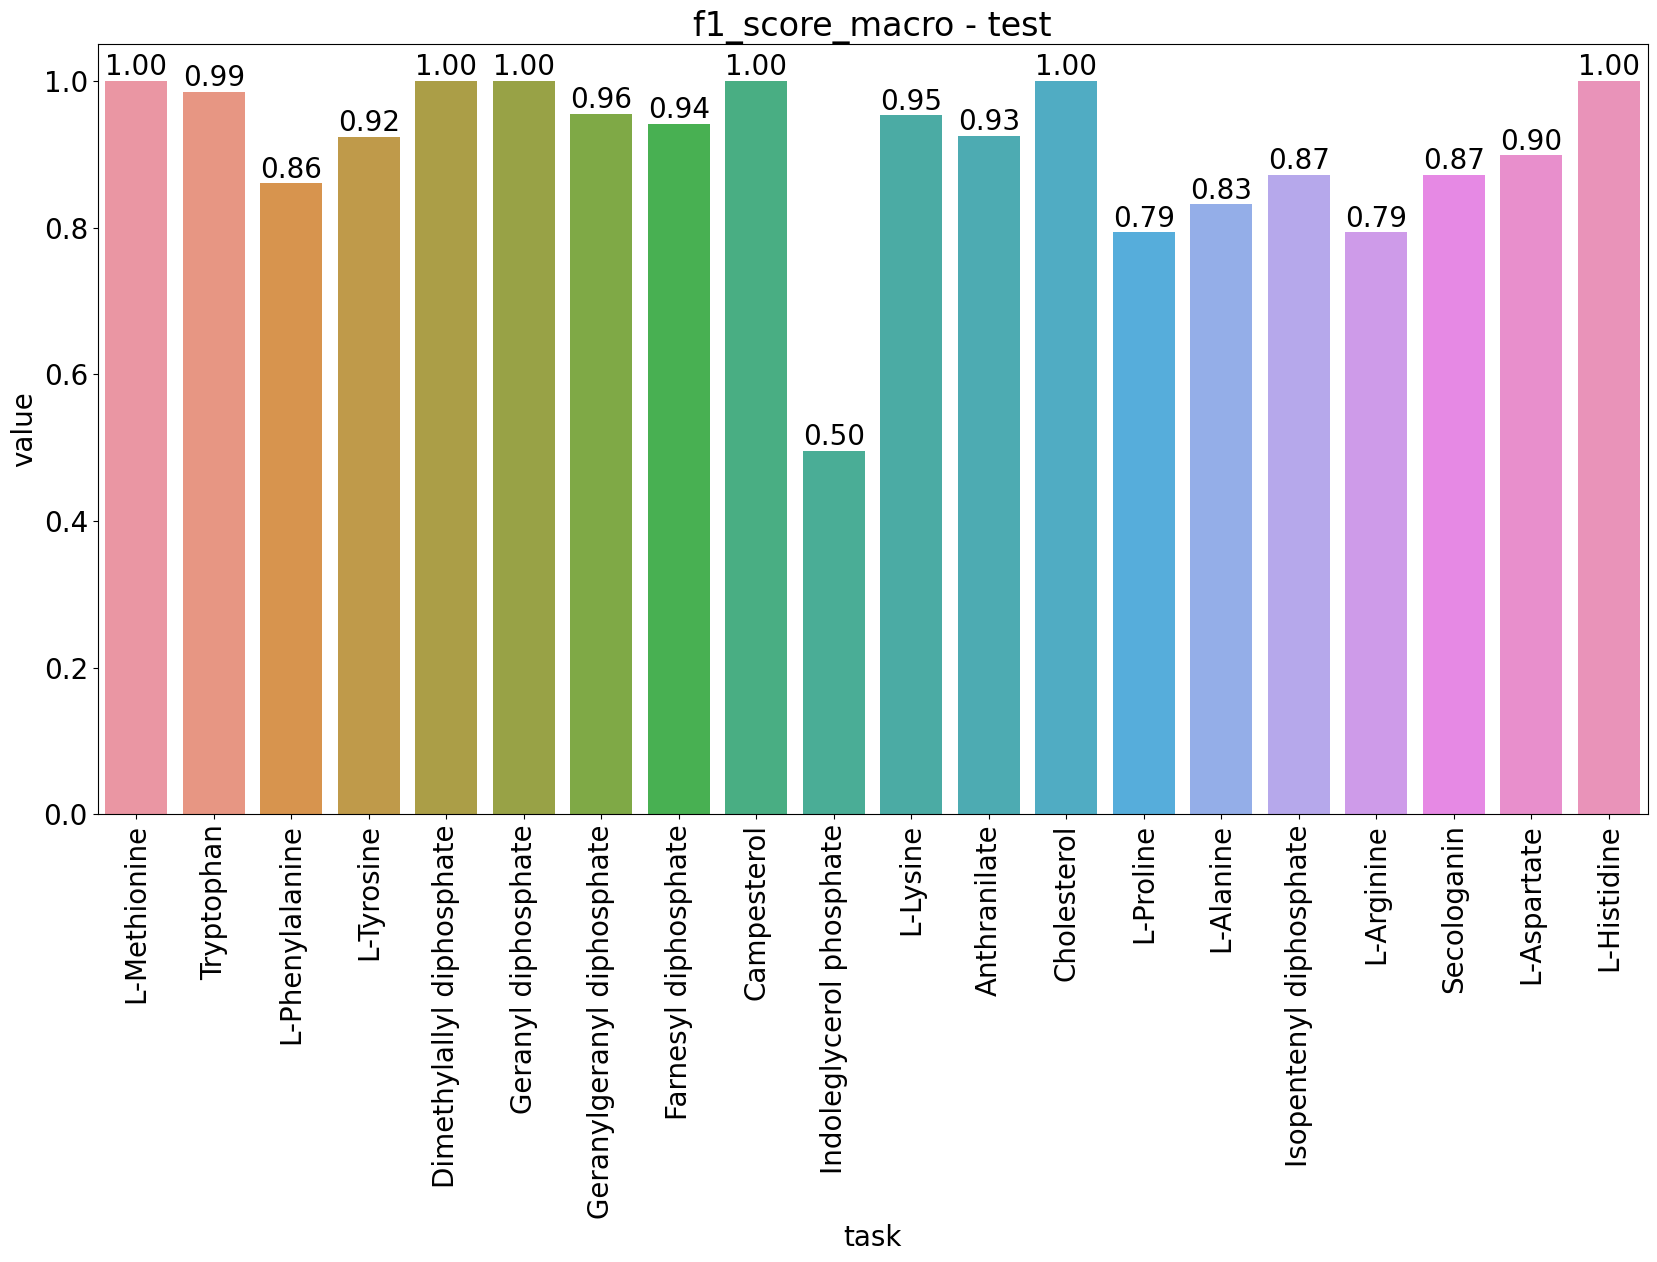

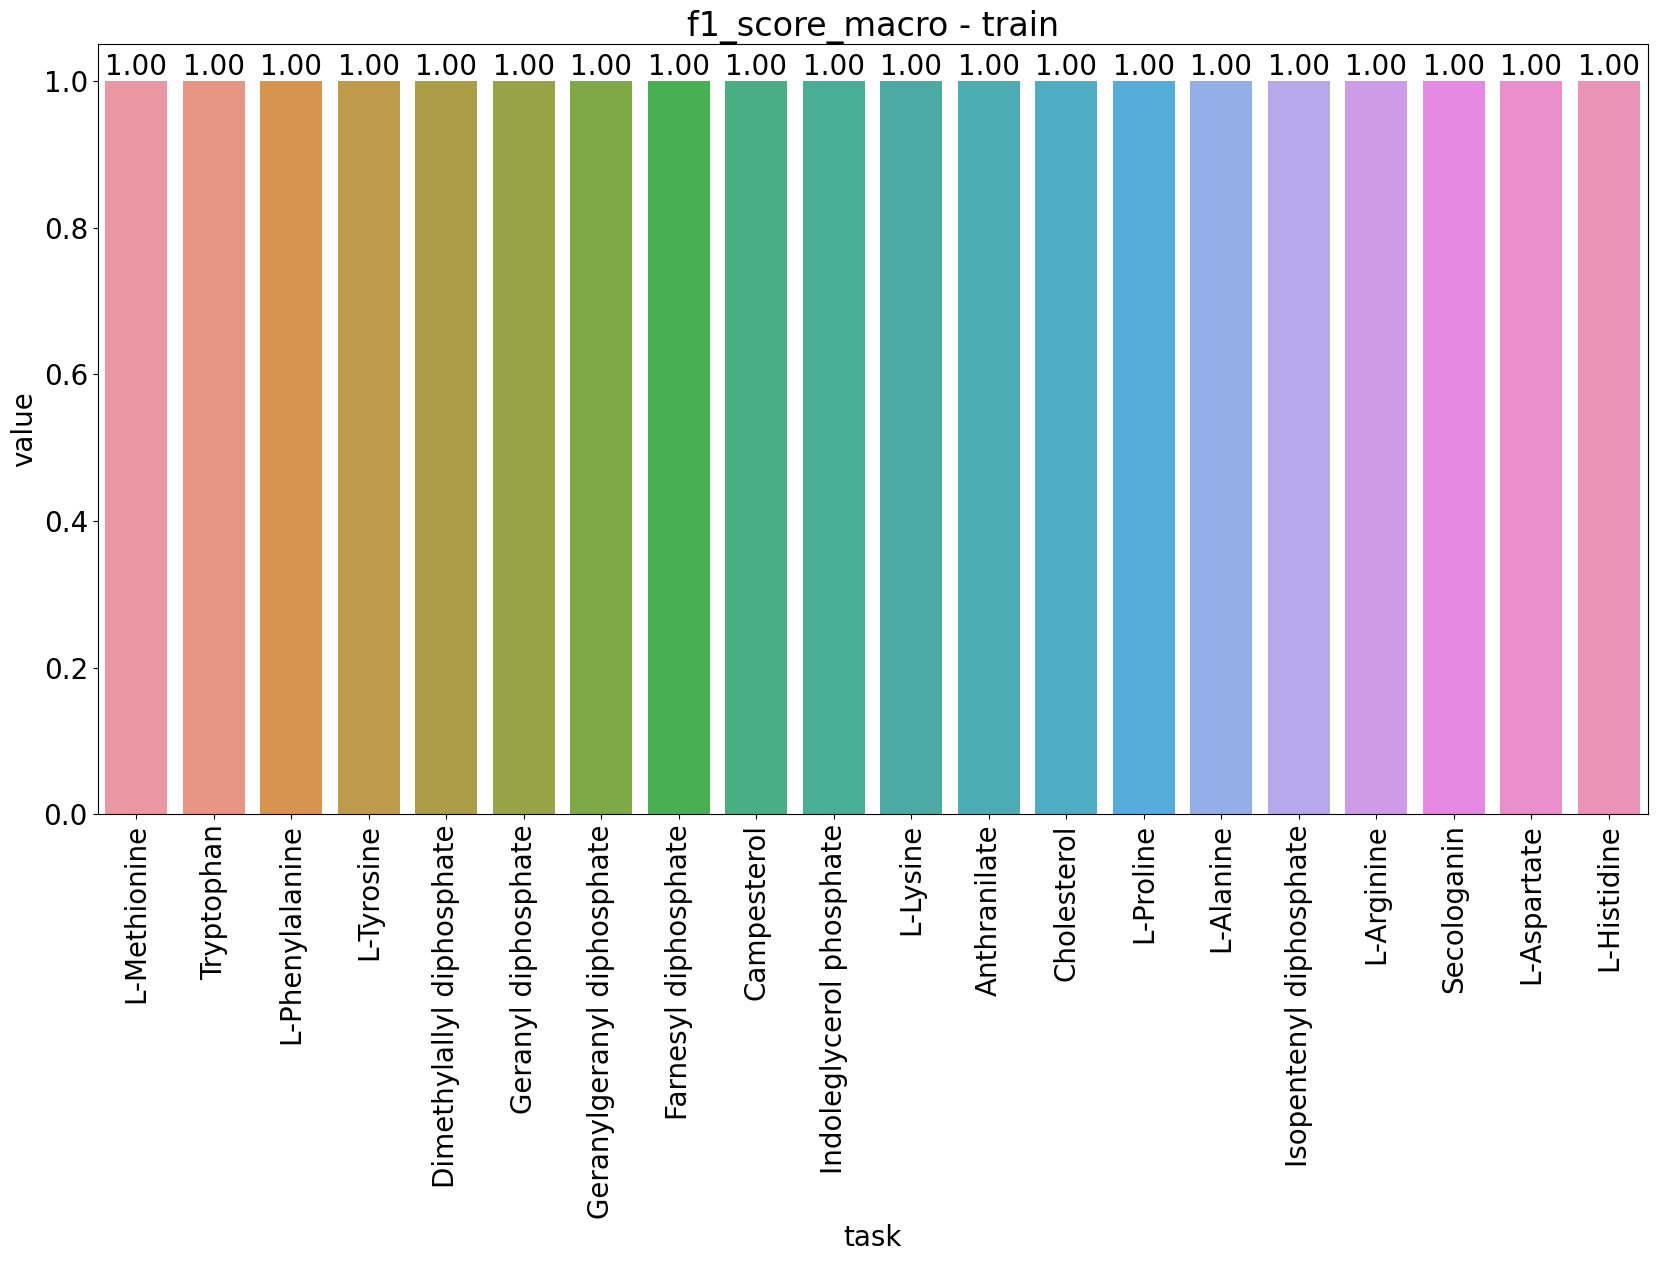

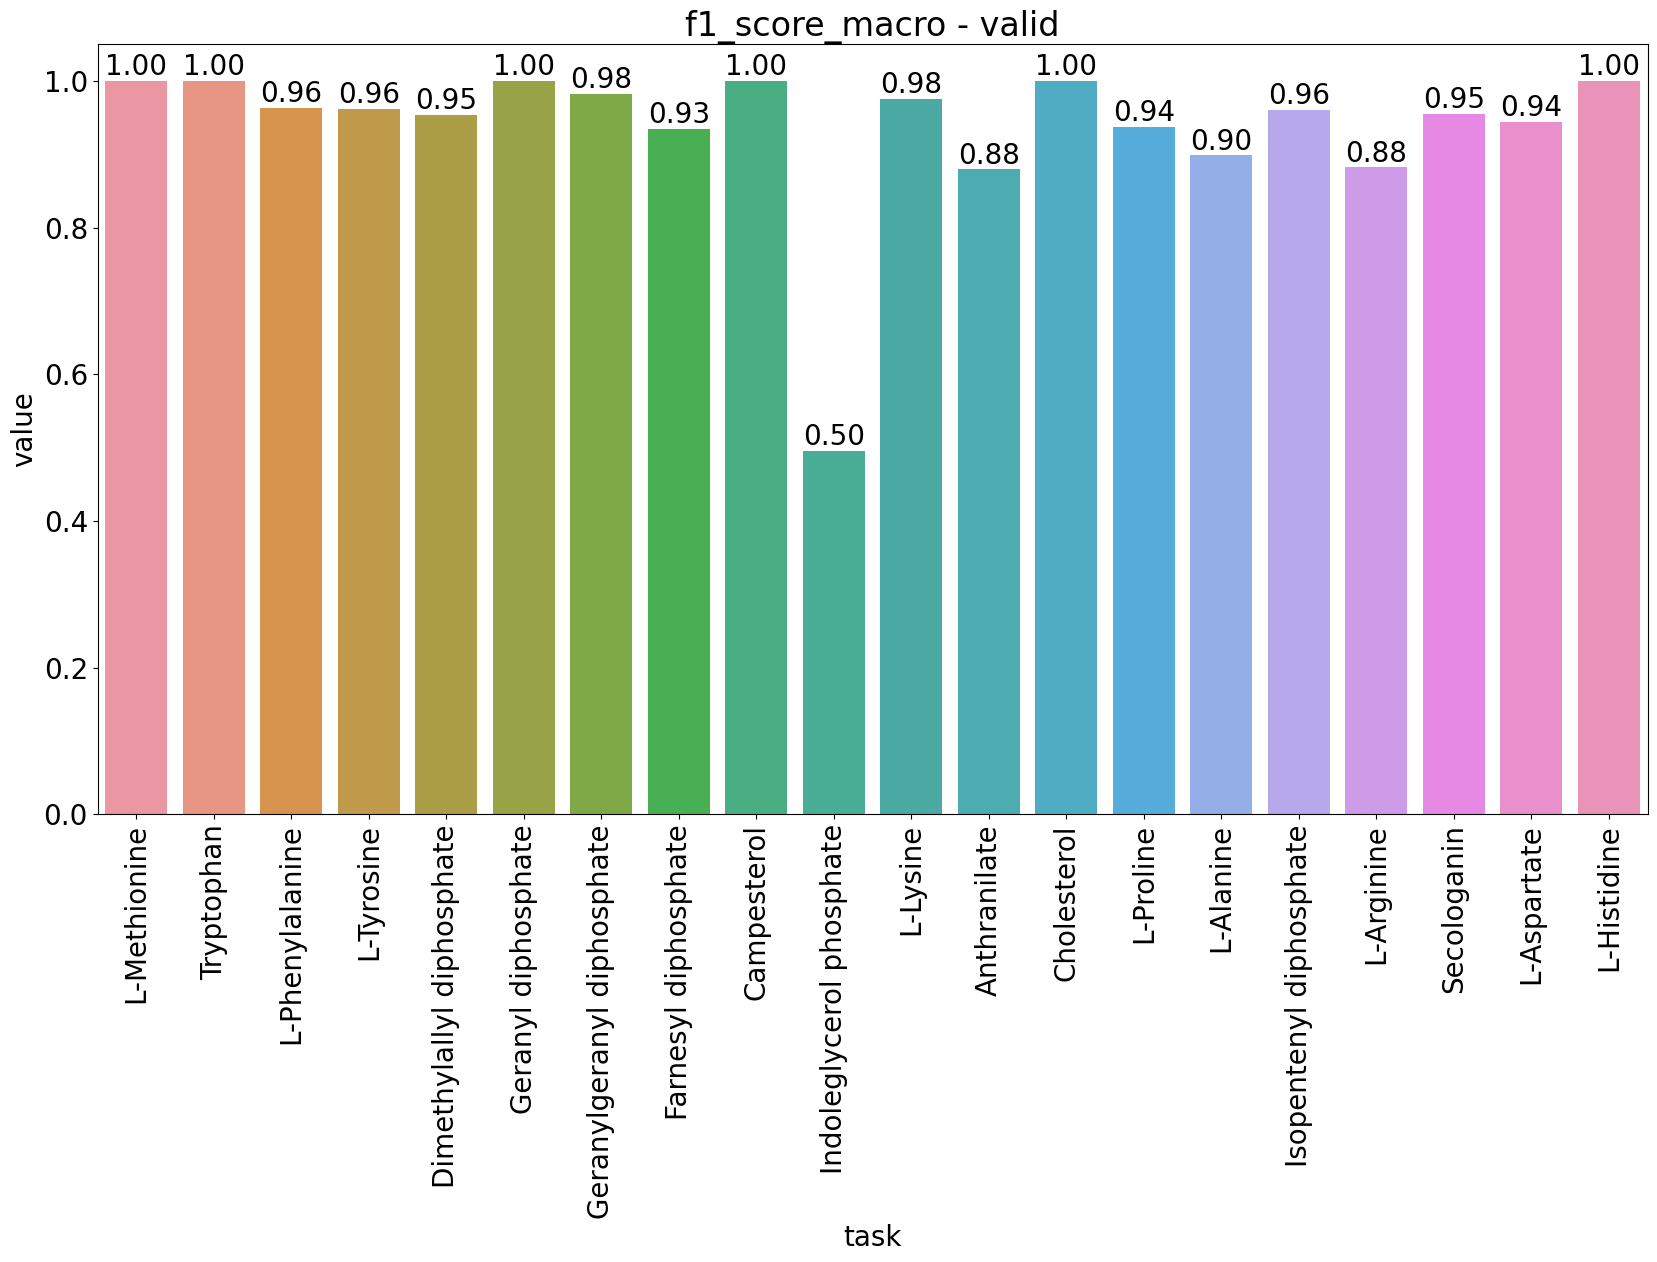

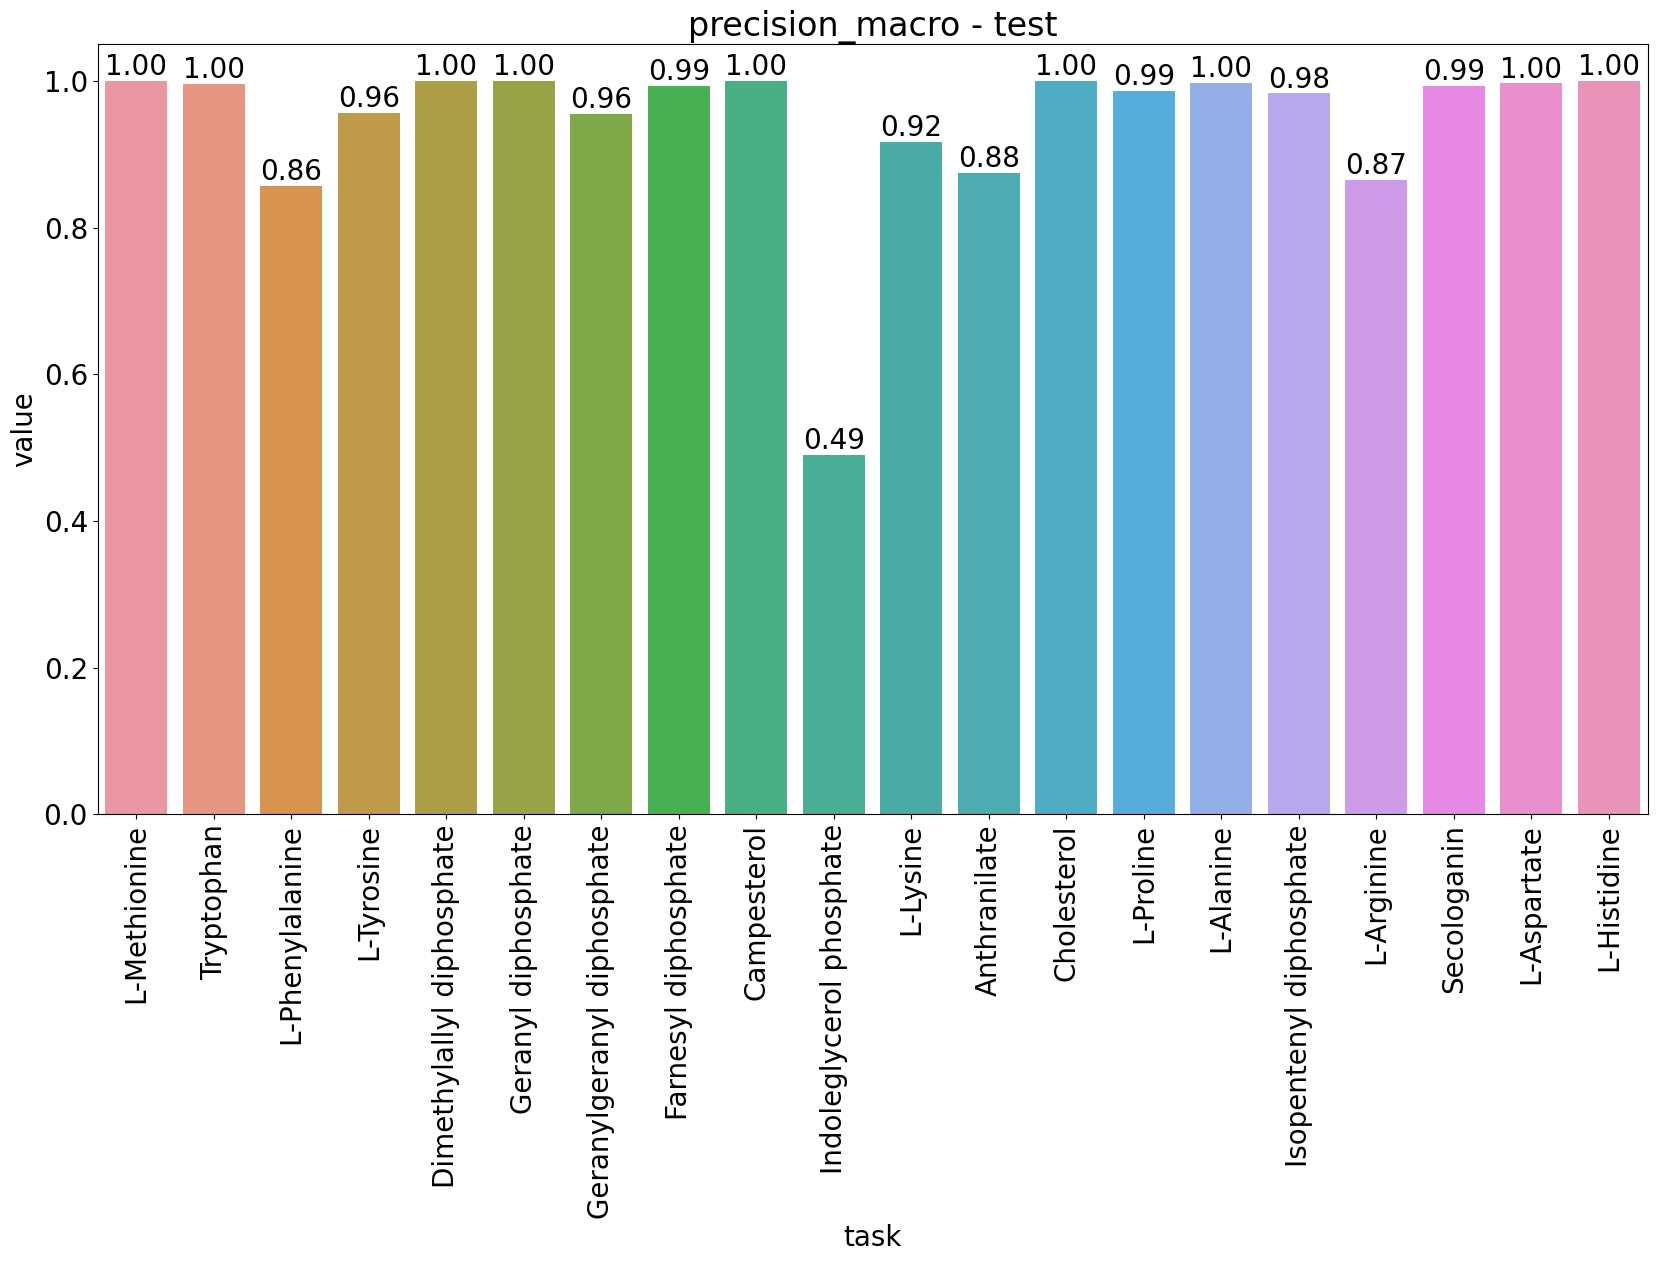

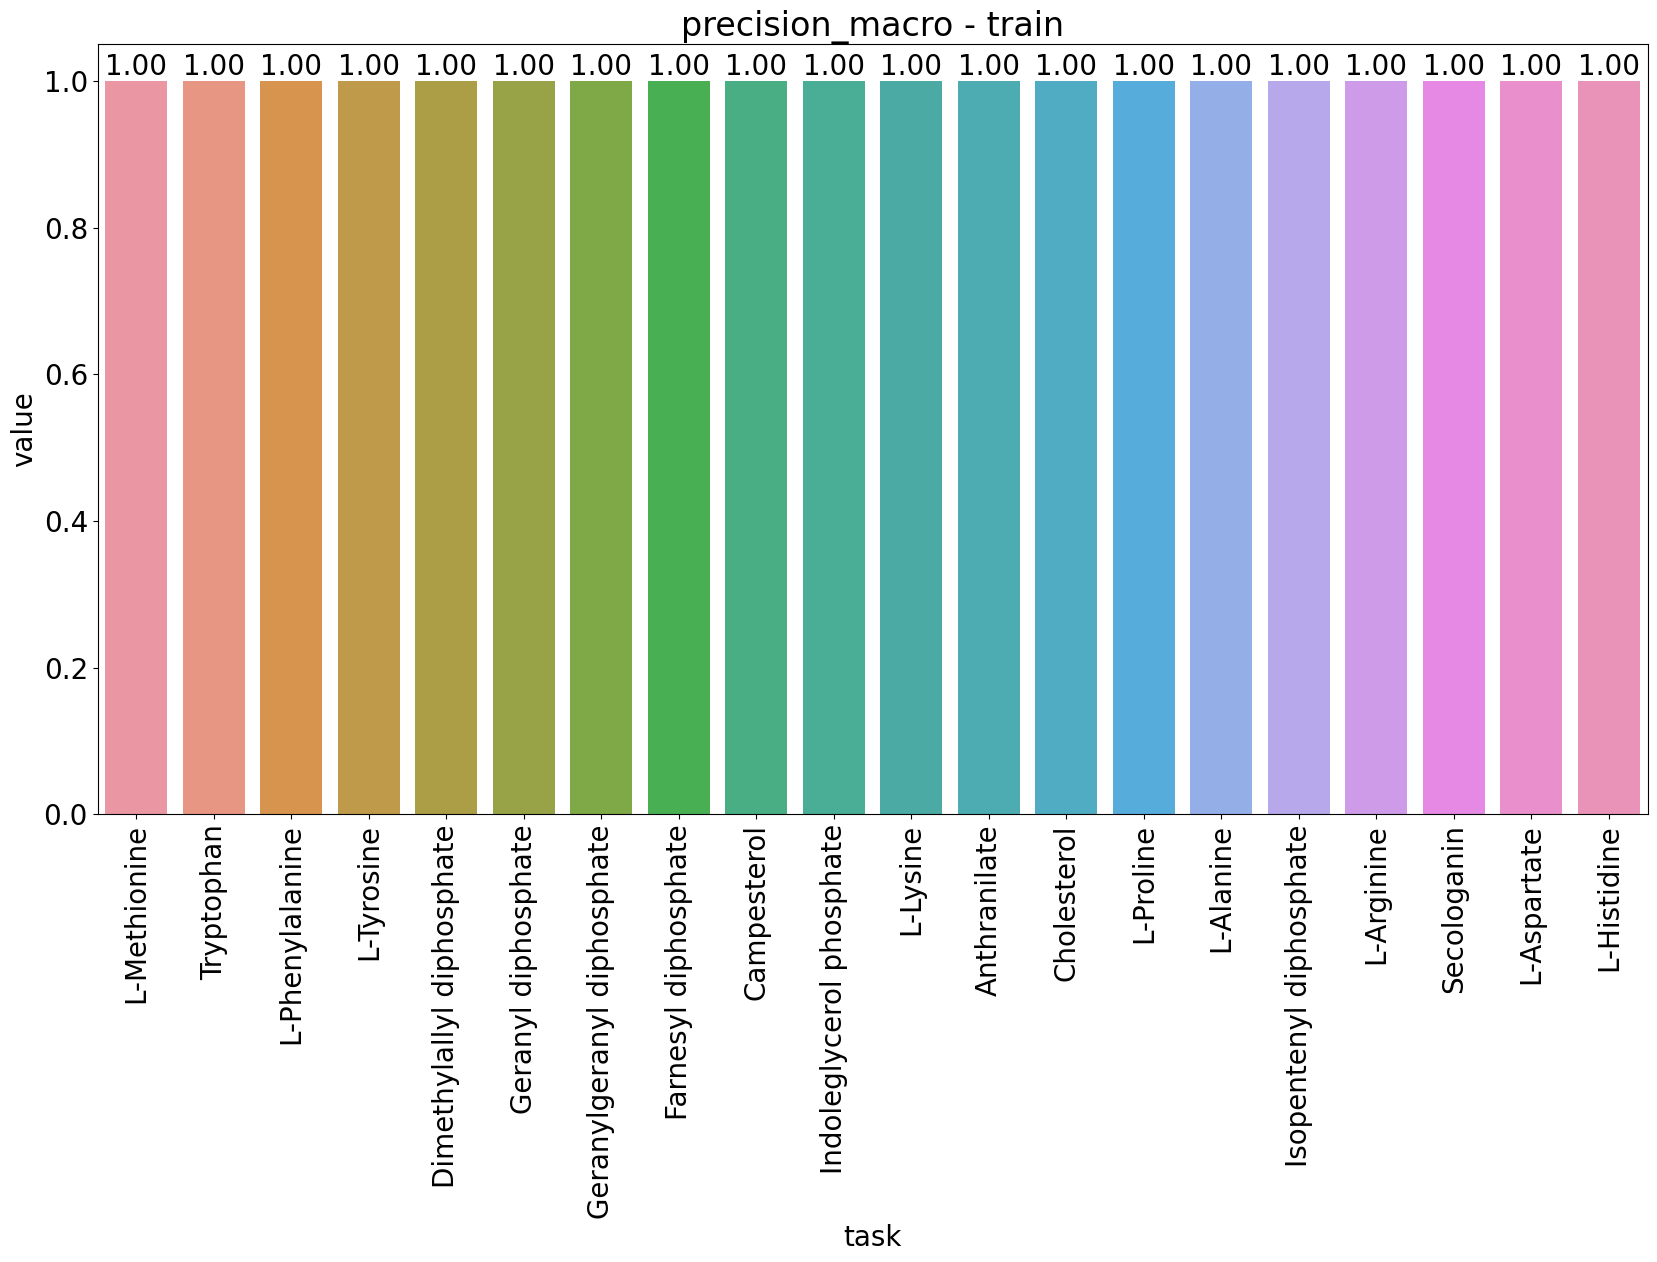

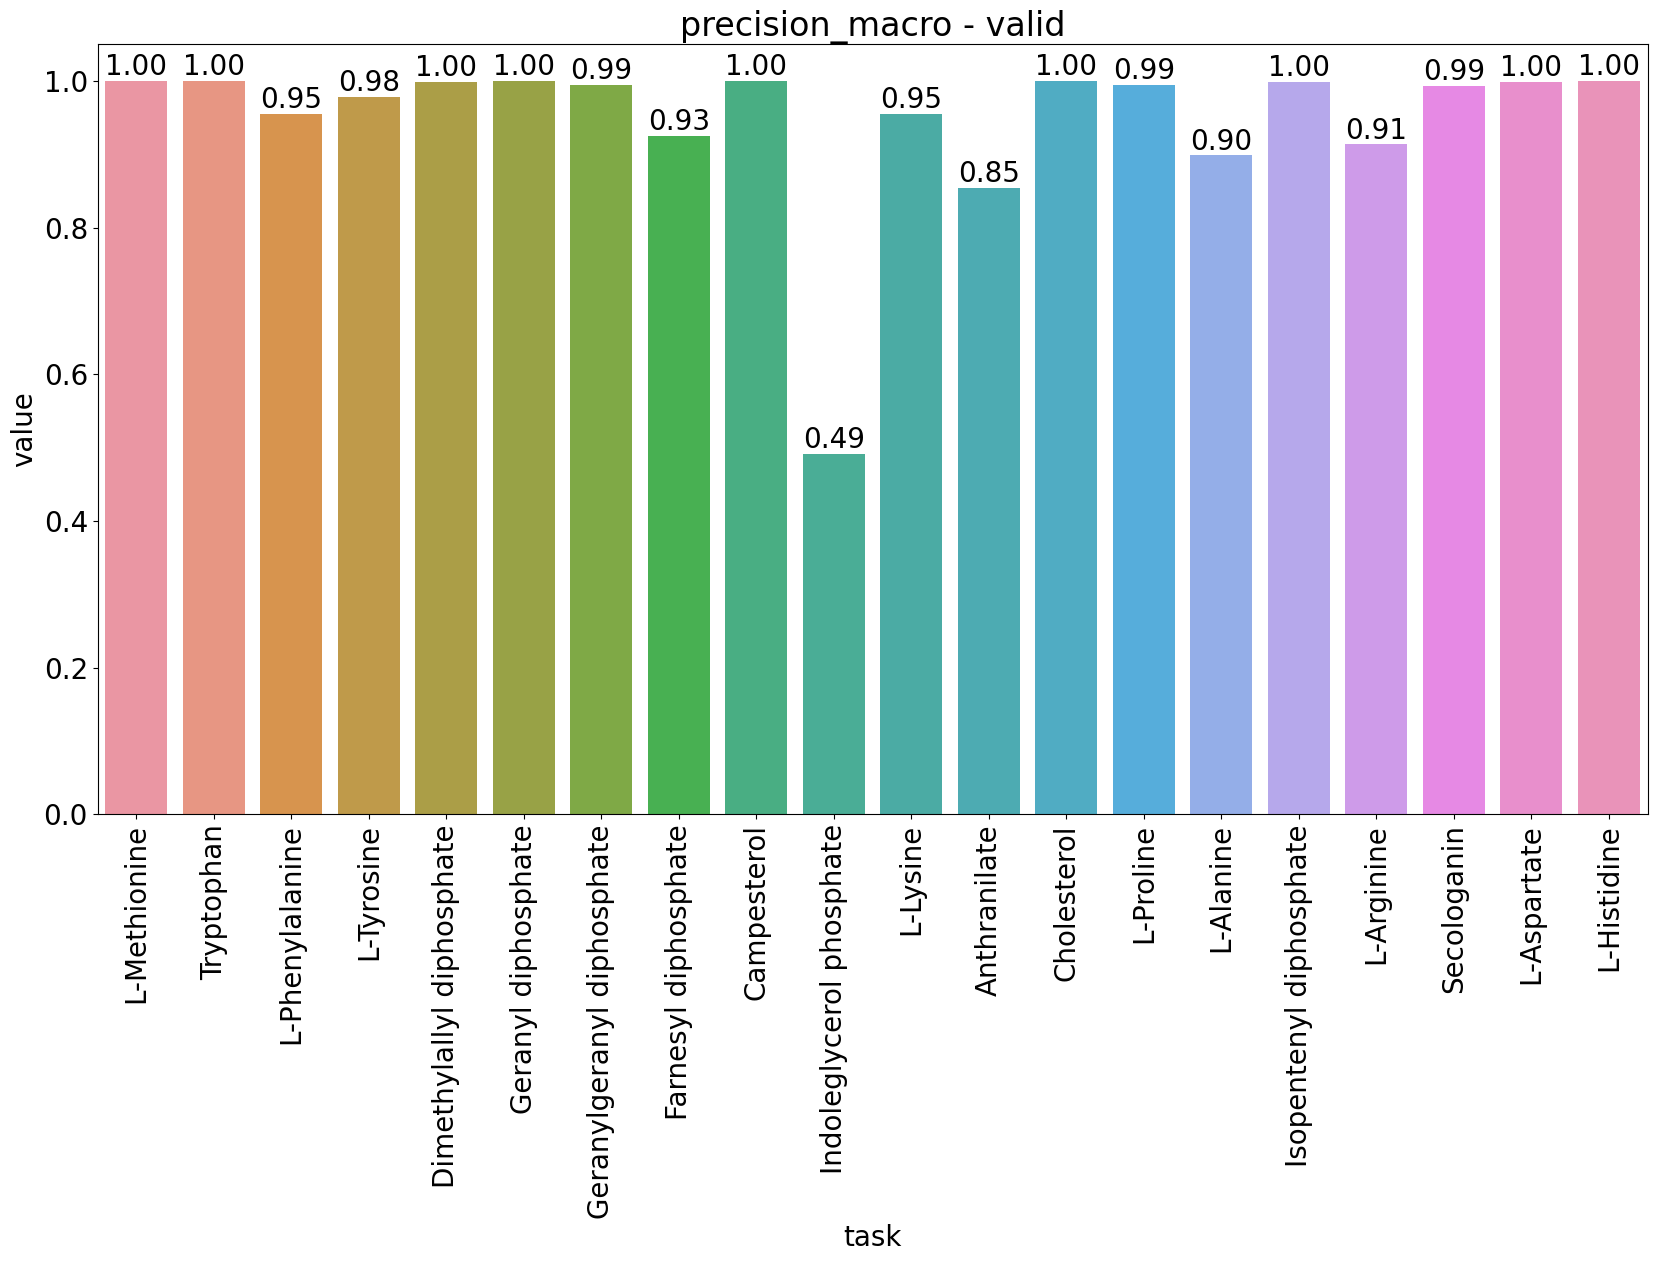

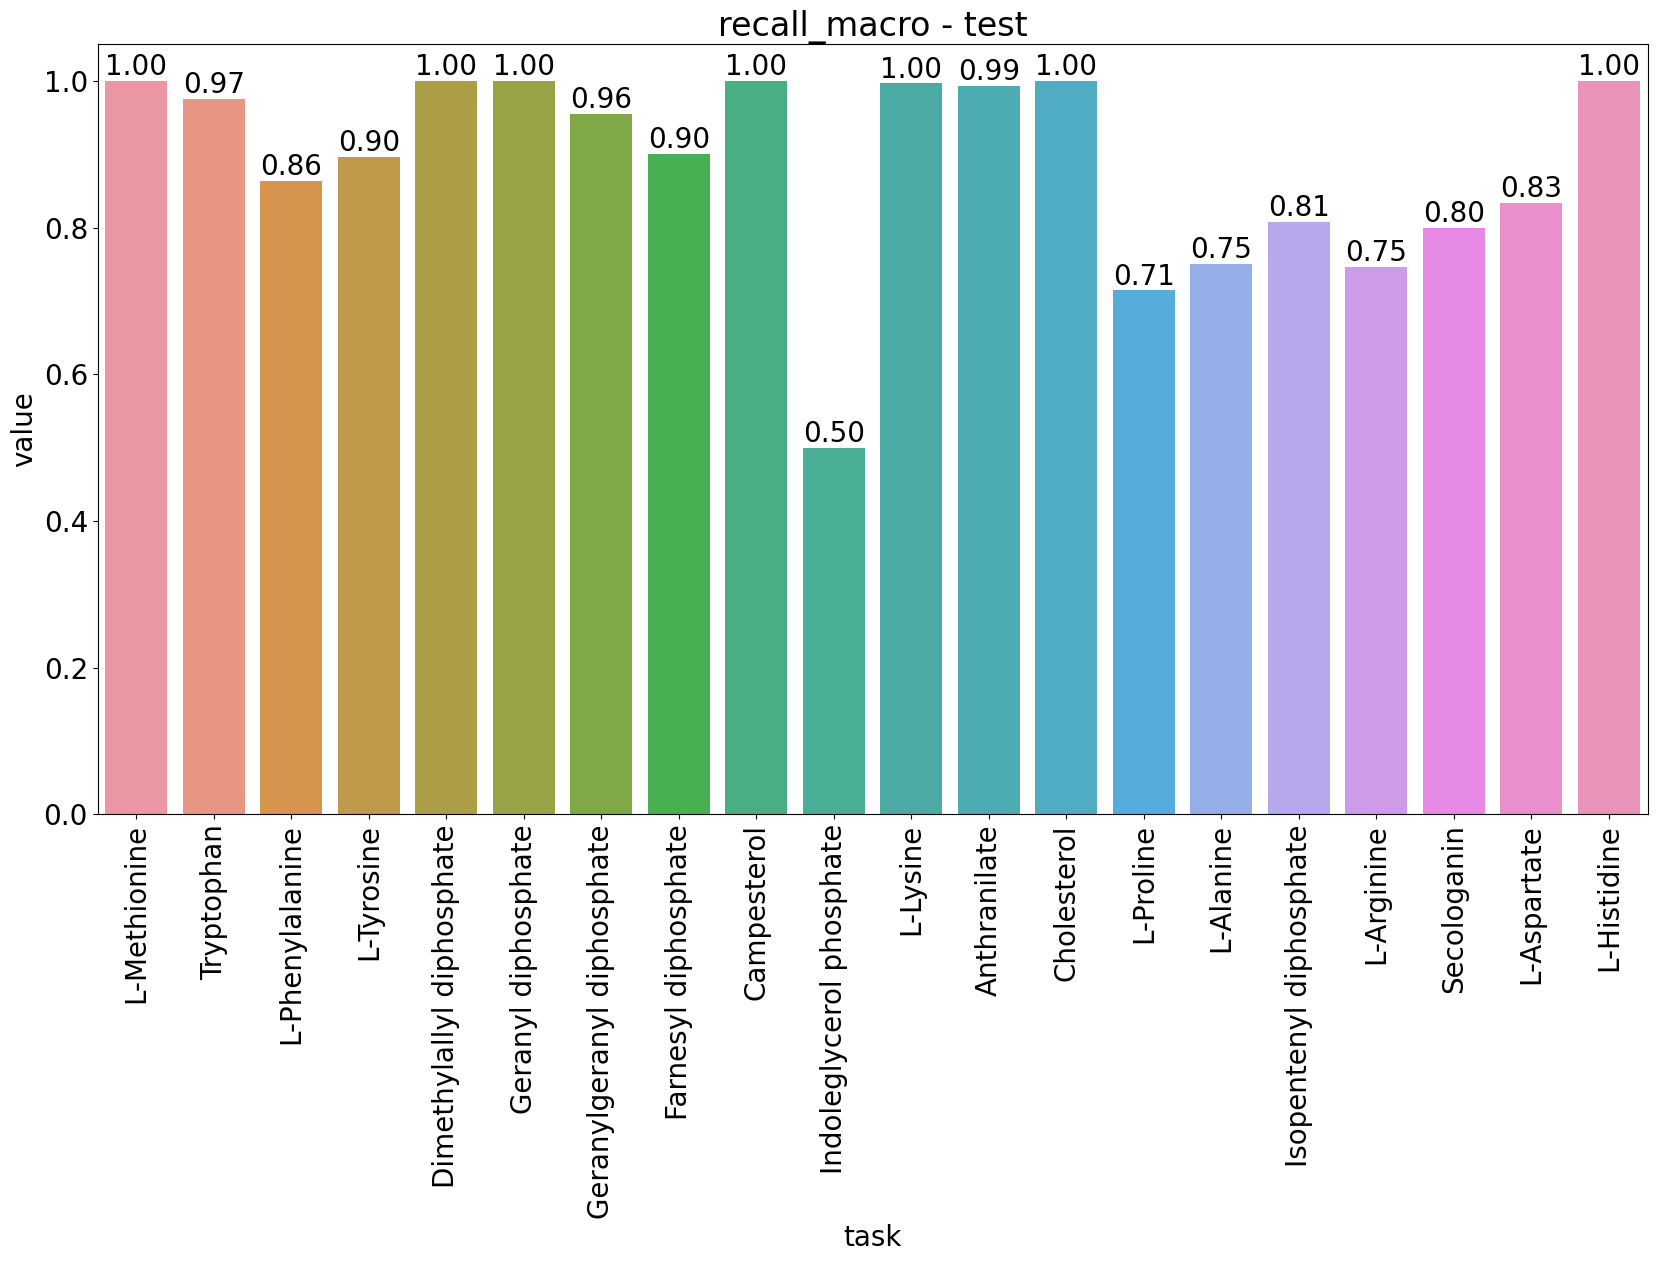

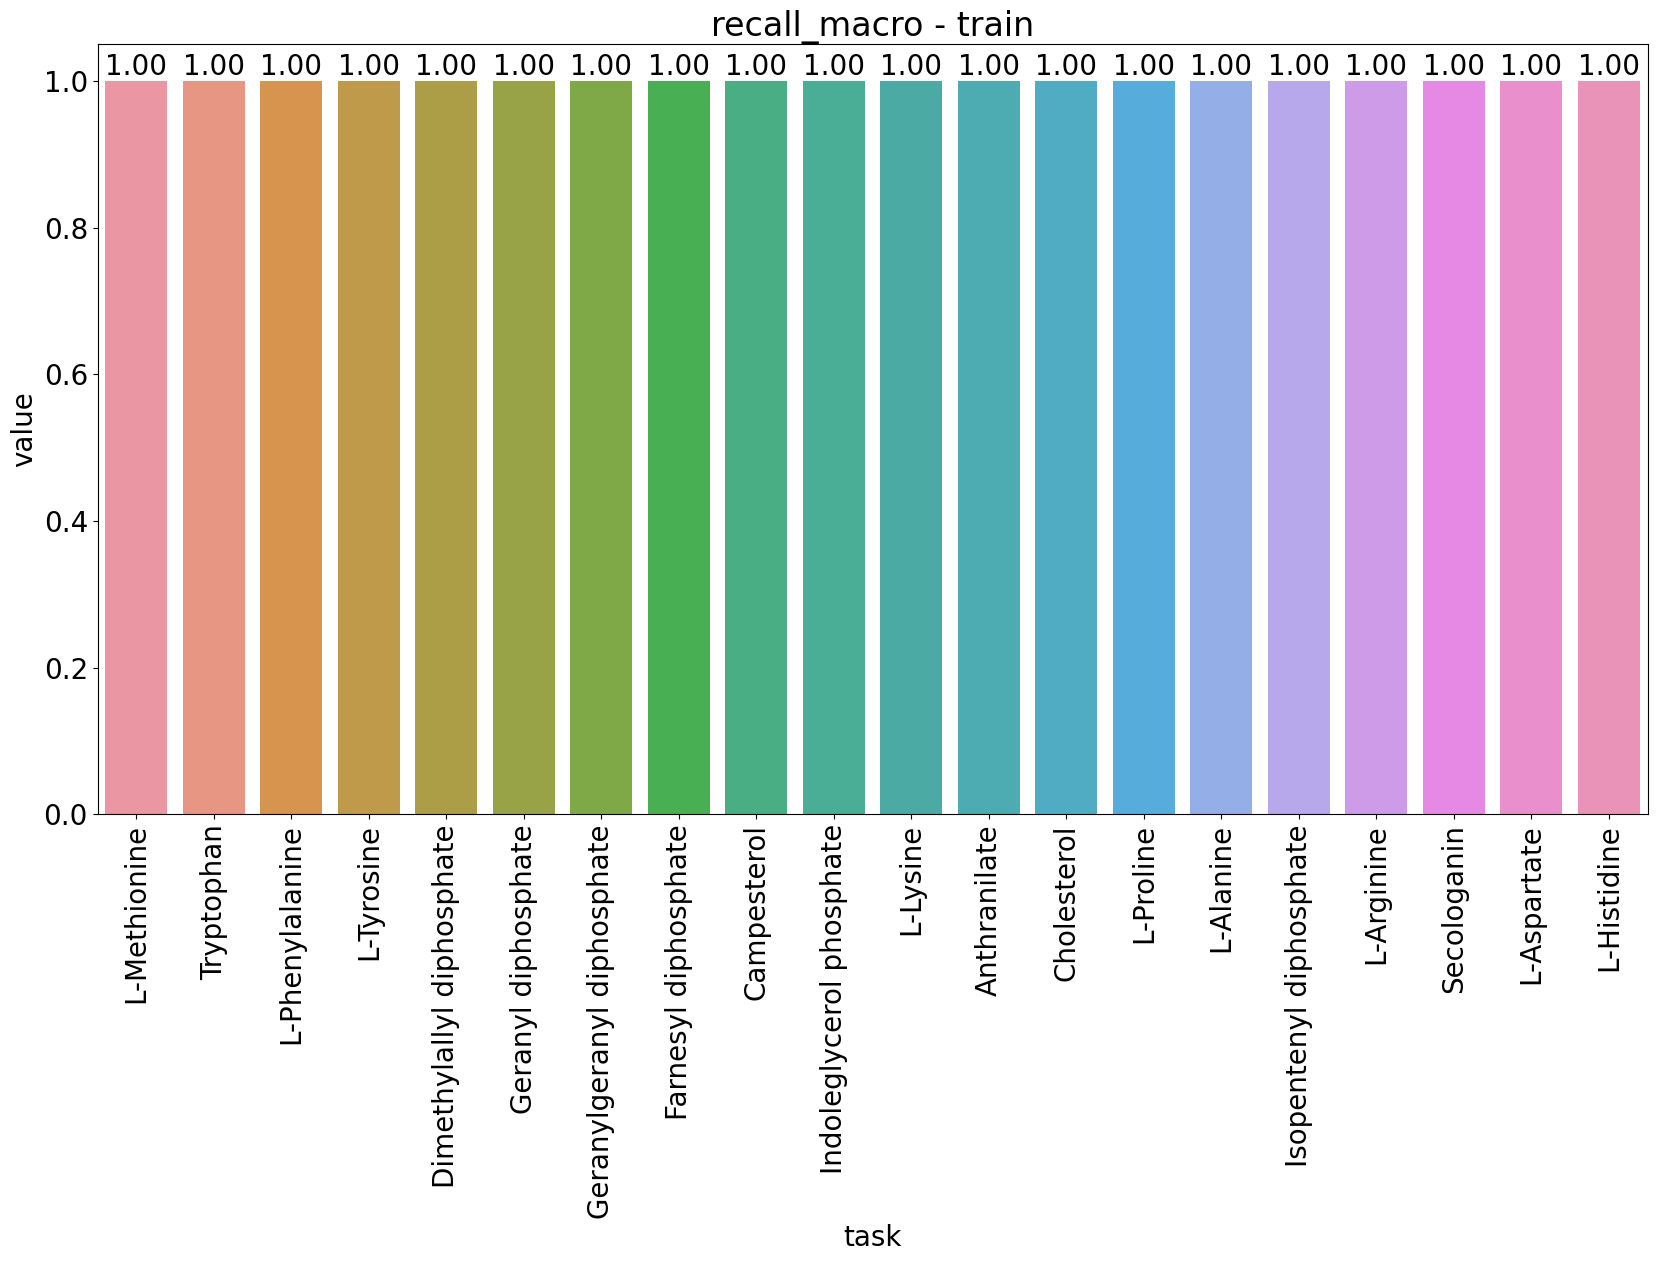

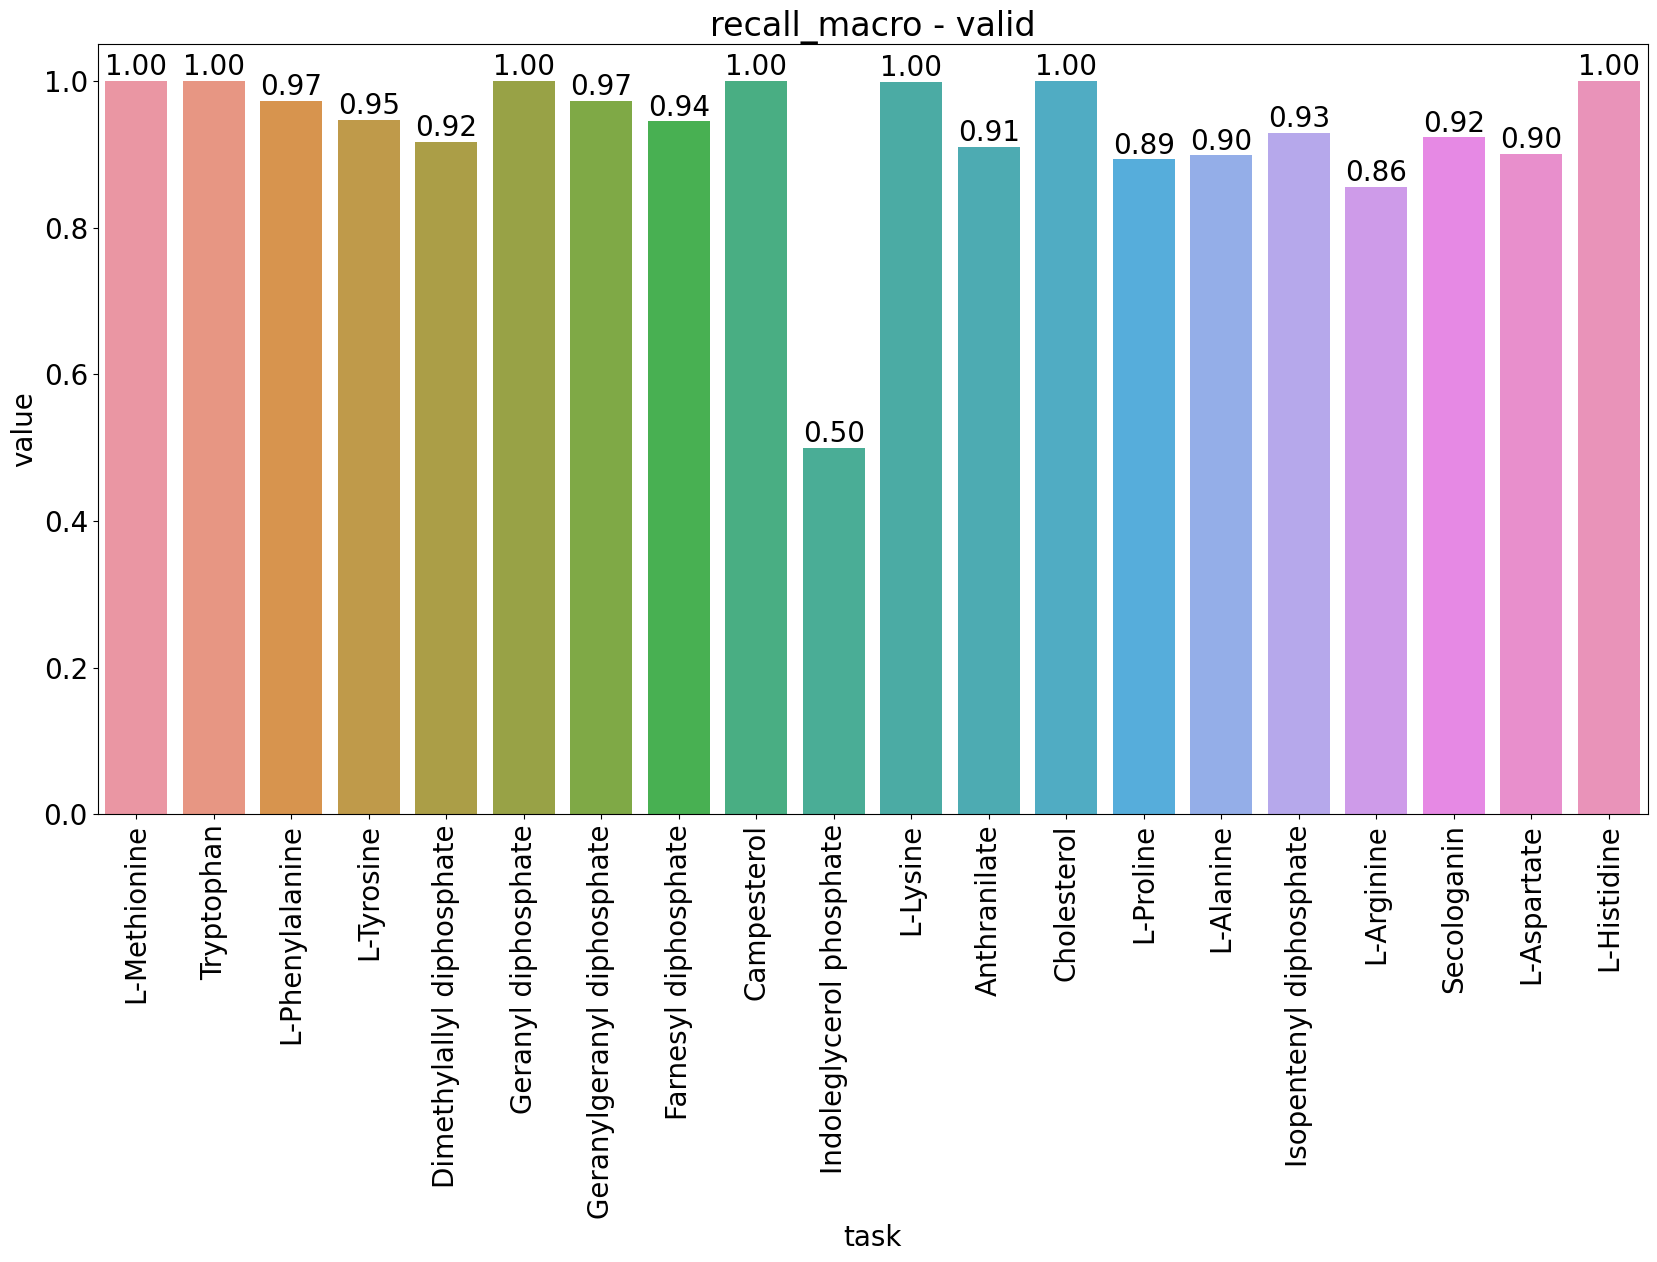

In [109]:
# make a bar plot for each metric and dataset with the values on top of the bars
import matplotlib.pyplot as plt
import seaborn as sns

for metric in results_per_metric.metric.unique():
    for dataset in results_per_metric.dataset.unique():
        plt.rc('font', size=20)
        plt.figure(figsize=(20, 10))
        ax = sns.barplot(x="task", y="value", data=results_per_metric[(results_per_metric.metric == metric) & (results_per_metric.dataset == dataset)])
        plt.xticks(rotation=90)
        plt.title(f"{metric} - {dataset}")
        # increase the text size in general

        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

        plt.show()

In [26]:
Pipeline.load("sm_predictor_pipeline_cmaes/trial_26").evaluate(test, [f1_score_macro_metric, precision_score_macro_metric, recall_score_macro_metric])

[14:28:25] Running Normalizer
[14:28:25] Running Normalizer
[14:28:25] Running Normalizer
[14:28:25] Running Normalizer
[14:28:25] Running Normalizer
[14:28:25] Running Uncharger
[14:28:25] Running Normalizer
[14:28:25] Running Uncharger
[14:28:25] Running Uncharger
[14:28:25] Running Uncharger
[14:28:25] Running Uncharger
[14:28:25] Running Normalizer
[14:28:25] Running Normalizer
[14:28:25] Running Uncharger
[14:28:25] Running Uncharger
[14:28:25] Running Uncharger
[14:28:25] Running Uncharger
[14:28:25] Running Uncharger
[14:28:25] Running Uncharger
[14:28:25] Running Uncharger
[14:28:25] Running Uncharger
[14:28:25] Running Uncharger
[14:28:25] Running Uncharger
[14:28:25] Running Uncharger
[14:28:25] Running Uncharger
[14:28:26] Running Uncharger
[14:28:26] Running Normalizer
[14:28:26] Running Uncharger
[14:28:26] Running Uncharger
[14:28:26] Running Uncharger
[14:28:26] Running Uncharger
[14:28:26] Running Uncharger
[14:28:26] Running Normalizer
[14:28:26] Running Normalizer
[14

({'f1_score_macro': 0.8183442113442114,
  'precision_macro': 0.8780430469289164,
  'recall_macro': 0.7797227608992314},
 {})

In [27]:
Pipeline.load("sm_predictor_pipeline_quasi_mote_carlo/trial_121").evaluate(test, [f1_score_macro_metric, precision_score_macro_metric, recall_score_macro_metric])

[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Running Uncharger
[14:30:54] Run

({'f1_score_macro': 0.7968987659821891,
  'precision_macro': 0.8833985908985909,
  'recall_macro': 0.7496464483229189},
 {})